In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msnbehdani/mock-dataset-of-second-hand-car-sales")

print("Path to dataset files:", path)

100%|██████████| 489k/489k [00:00<00:00, 1.18MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/msnbehdani/mock-dataset-of-second-hand-car-sales/versions/1


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
sns.set(style="whitegrid")

In [ ]:
data = '/root/.cache/kagglehub/datasets/msnbehdani/mock-dataset-of-second-hand-car-sales/versions/1/car_sales_data.csv'
df = pd.read_csv(data, delimiter=',')

# Display the first few rows of the dataframe
print('Dataframe shape:', df.shape)
df.head()

Dataframe shape: (50000, 7)


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [ ]:
df.shape

(50000, 7)

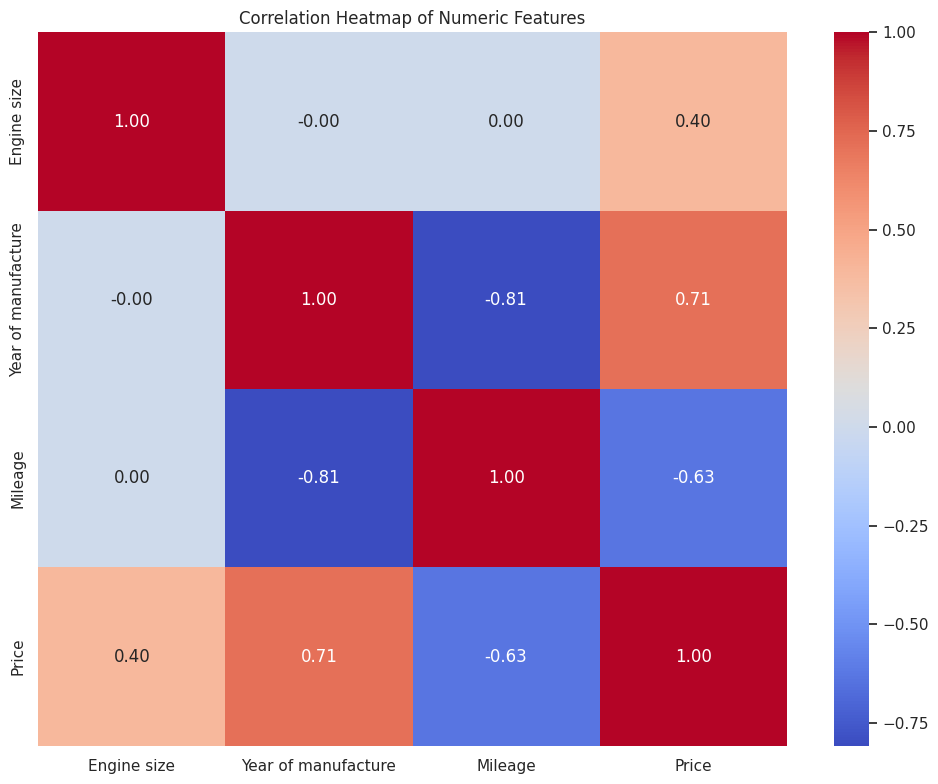

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
# Check if there are four or more numeric columns to plot correlation
plt.figure(figsize=(10, 8))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

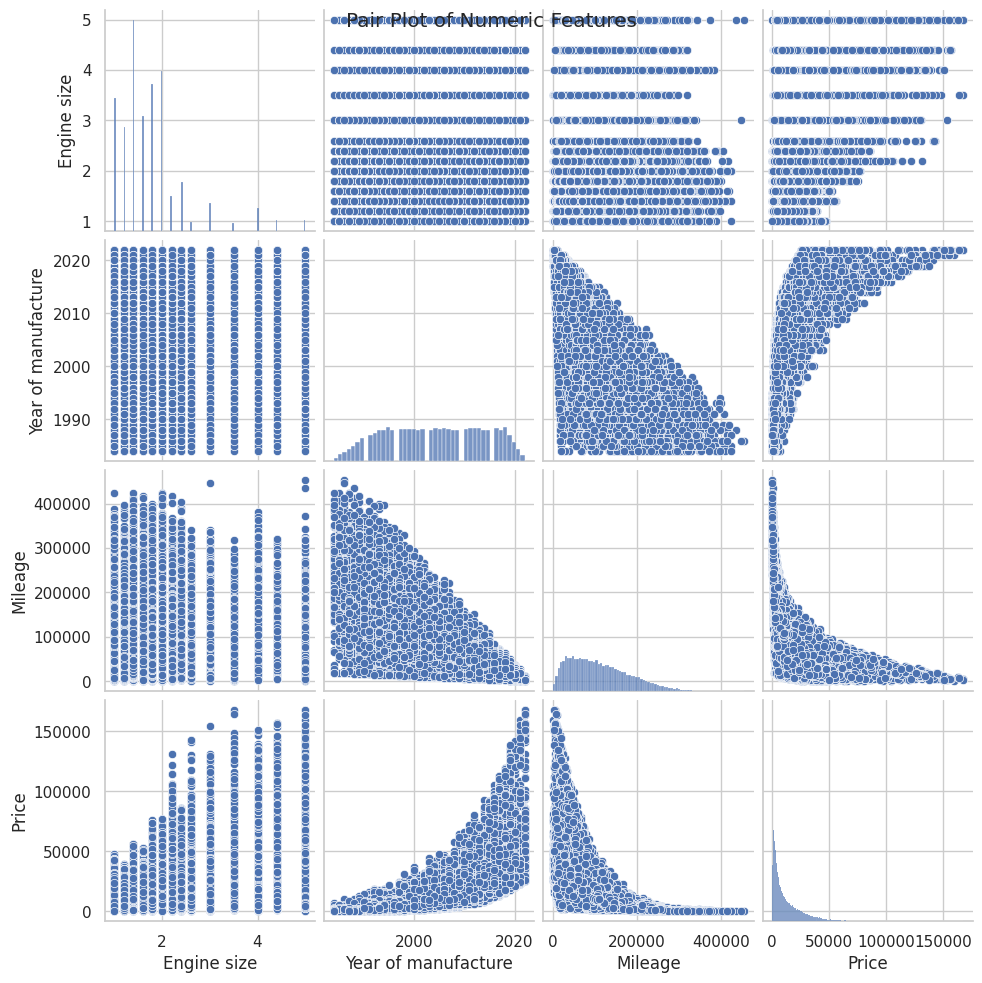

In [ ]:
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features')
plt.show()

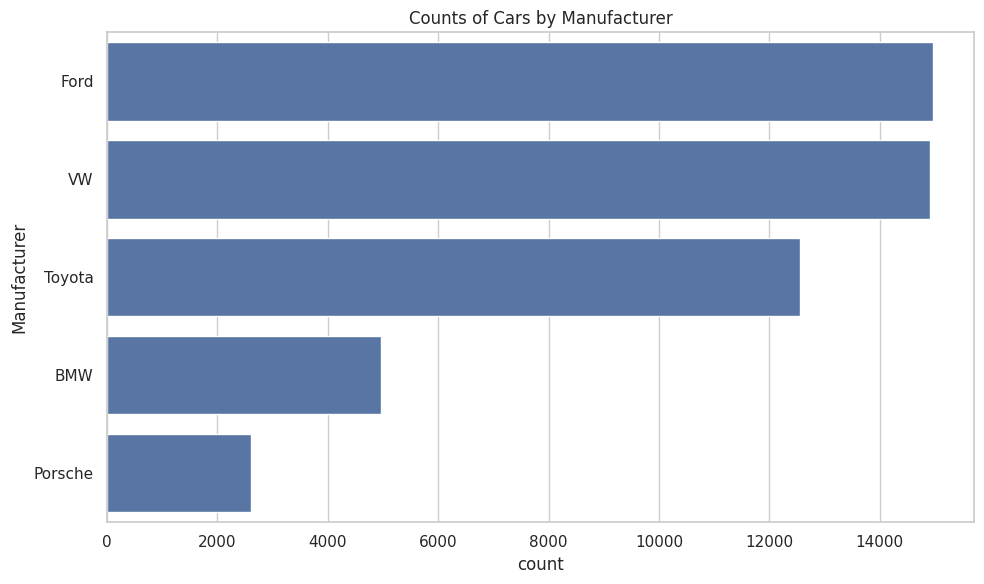

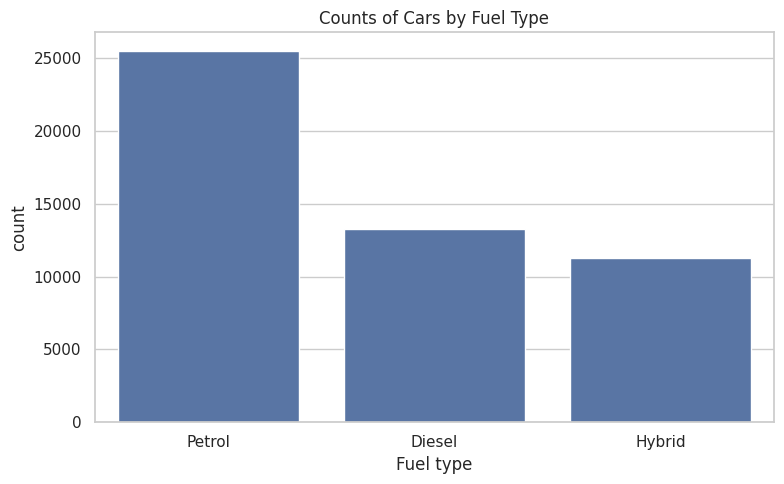

In [ ]:
# Manufacturer count plot
plt.figure(figsize=(10, 6))
sns.countplot(y='Manufacturer', data=df, order=df['Manufacturer'].value_counts().index)
plt.title('Counts of Cars by Manufacturer')
plt.tight_layout()
plt.show()

# Fuel type count plot (Using Bar Plot style)
plt.figure(figsize=(8, 5))
sns.countplot(x='Fuel type', data=df, order=df['Fuel type'].value_counts().index)
plt.title('Counts of Cars by Fuel Type')
plt.tight_layout()
plt.show()

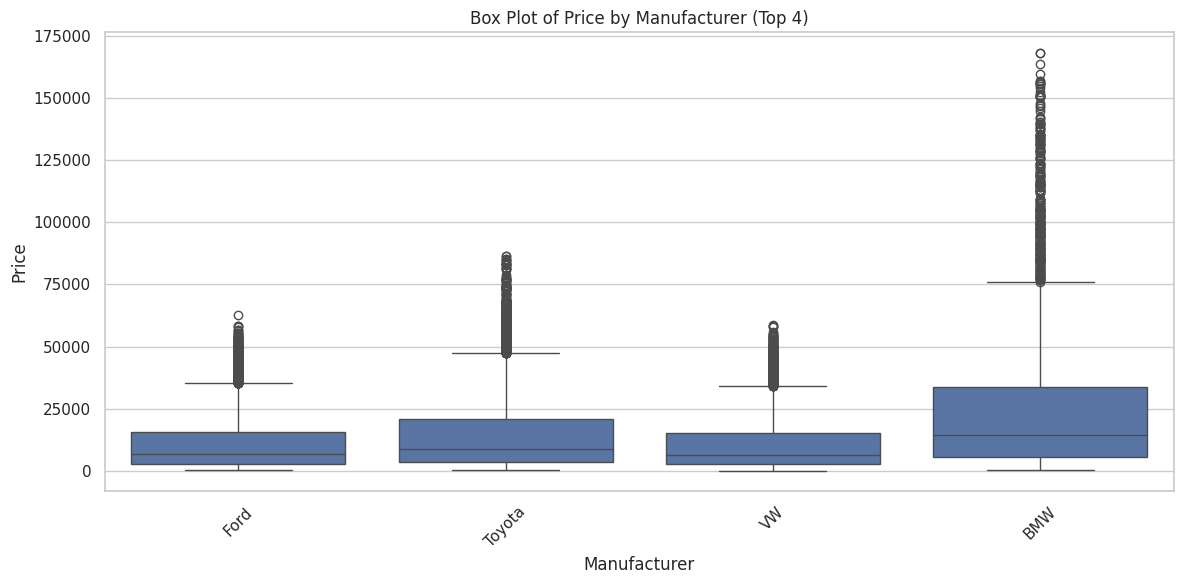

In [ ]:
top_manufacturers = df['Manufacturer'].value_counts().index[:4]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Manufacturer', y='Price', data=df[df['Manufacturer'].isin(top_manufacturers)])
plt.xticks(rotation=45)
plt.title('Box Plot of Price by Manufacturer (Top 4)')
plt.tight_layout()
plt.show()

In [ ]:
df['Manufacturer'].value_counts()

,count
Manufacturer,
Ford,14959
VW,14913
Toyota,12554
BMW,4965
Porsche,2609


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# For simplicity, we drop missing values if any exist
df.dropna(inplace=True)

# Encoding categorical variables using one-hot encoding
categorical_cols = ['Manufacturer', 'Model', 'Fuel type']
ohe = OneHotEncoder(drop='first')
encoded_cols = ohe.fit_transform(df[categorical_cols])

Missing values in each column:
Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64


In [ ]:
df = pd.concat([df, pd.DataFrame(encoded_cols.toarray())], axis=1)

In [ ]:
df_encoded = df.drop(categorical_cols, axis=1)
df_encoded.columns = df_encoded.columns.astype(str)

In [ ]:
df_encoded.head()

,Engine size,Year of manufacture,Mileage,Price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,2002,127300,3074,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.0,2016,57850,49704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.6,2014,39190,24072,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.8,1988,210814,1705,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,2006,127869,4101,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
scl = StandardScaler()
df_en = df_encoded[['Engine size','Year of manufacture','Mileage','Price']]
df_en.head()

,Engine size,Year of manufacture,Mileage,Price
0,1.0,2002,127300,3074
1,4.0,2016,57850,49704
2,1.6,2014,39190,24072
3,1.8,1988,210814,1705
4,1.0,2006,127869,4101


In [ ]:
df_encoded_scaled = pd.DataFrame(scl.fit_transform(df_en), columns = df_en.columns)
df_encoded_scaled.head()

,Engine size,Year of manufacture,Mileage,Price
0,-1.053068,-0.229056,0.206650,-0.655127
1,3.033566,1.222343,-0.762892,2.185305
2,-0.235742,1.015000,-1.023391,0.623951
3,0.036701,-1.680454,1.372528,-0.738519
4,-1.053068,0.185630,0.214593,-0.592568


In [ ]:
df_encoded.drop(['Engine size','Year of manufacture','Mileage','Price'], axis=1, inplace=True)
df_encoded = pd.concat([df_encoded_scaled, df_encoded], axis=1)
df_encoded.head()

,Engine size,Year of manufacture,Mileage,Price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.053068,-0.229056,0.206650,-0.655127,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.033566,1.222343,-0.762892,2.185305,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.235742,1.015000,-1.023391,0.623951,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.036701,-1.680454,1.372528,-0.738519,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.053068,0.185630,0.214593,-0.592568,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# Instantiate and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=46)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 0.01700289769932715
R2 Score: 0.9985866172695118
